Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


General Summary

In [4]:
ps = df.loc[:,('throwSuccess','pressureSituation')].copy()
ps.dropna(inplace=True)
ps['throwSuccess'].replace(2.0, 1.0,inplace=True)
s = [0, 1,4,5,7]
ps = ps[ps.pressureSituation.isin(s) == True]
ps['pressureSituation'].replace(4.0, 1.0,inplace=True)
ps['pressureSituation'].replace(5.0, 1.0,inplace=True)
ps['pressureSituation'].replace(7.0, 1.0,inplace=True)
# print(ps)
# X_ps = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
#      'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
#      'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
#      'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
#      'FirstInNachWurf']
# for i,s in enumerate(X_ps):
#     ps['pressureSituation'].replace(i, s,inplace=True)

# print(ps)
# ps1 =pd.DataFrame(ps.groupby('throwSuccess').pressureSituation.value_counts()).unstack()
# ps1
contigency= pd.crosstab(ps['throwSuccess'], ps['pressureSituation'], margins=True, margins_name="Total") 
contigency



pressureSituation,0.0,1.0,Total
throwSuccess,,,
0.0,155,27,182
1.0,519,117,636
Total,674,144,818


throwSuccess,Failed,Success
pressureSituation,,
GoalKeeper Changed,0.18750,0.81250
Same GoalKeeper,0.22997,0.77003


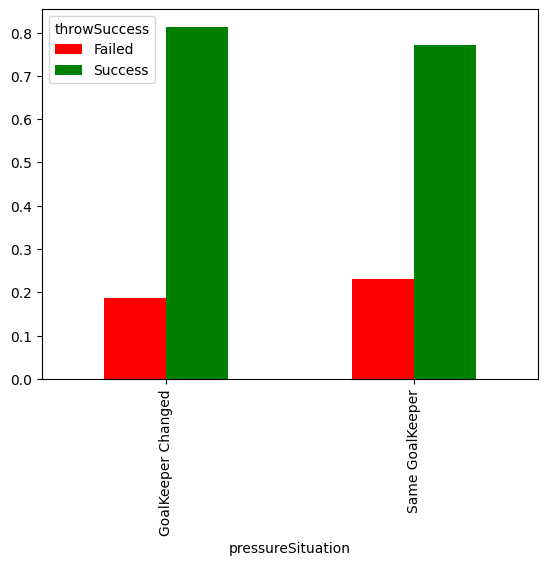

In [5]:
#contigency_pct = pd.crosstab(ps['throwSuccess'], ps['pressureSituation'], normalize='all', margins=True, margins_name="Total")
dfpct = ps.copy()
dfpct['pressureSituation'].replace(0.0,'Same GoalKeeper',inplace=True)
dfpct['pressureSituation'].replace(1.0,'GoalKeeper Changed',inplace=True)
dfpct['throwSuccess'].replace(0.0,'Failed',inplace=True)
dfpct['throwSuccess'].replace(1.0,'Success',inplace=True)
contigency_pct = pd.crosstab(dfpct['pressureSituation'],dfpct['throwSuccess'], normalize='index')
contigency_pct.plot(kind='bar',stacked=False,color={"Failed": "red", "Success": "green"})
contigency_pct

In [6]:
from scipy.stats import chi2_contingency


# null hypo : no significant association between pressure situation and throwsuccess
# research hypo : There is relation between pressure situation and throwsuccess
# for df=1 & alpha=0.05 c =1(Chi-square table)
contigencychi= pd.crosstab(ps['throwSuccess'], ps['pressureSituation']) 
c, p, dof, expected = chi2_contingency(contigencychi) 
print(c,p,dof)
print(expected)
#c > 3.84  Null Hypo accepted with 5% error

# Also,
# P-value ≤ α: The variables have a statistically significant association (Reject H0)
# If the p-value is less than or equal to the significance level, you reject the null hypothesis and conclude that there is a statistically significant association between the variables.
# P-value > α: Cannot conclude that the variables are associated (Fail to reject H0)
# If the p-value is larger than the significance level, you fail to reject the null hypothesis because there is not enough evidence to conclude that the variables are associated.

ModuleNotFoundError: No module named 'scipy'

Changing Goalkeeper increses the chances of Throw Success but as per Chi Square Test we can conclude that there is no statistically significant association between Throw Success and Pressure Situation with 5% error.